# Capstone Project 1 - Applicance Energy Prediction

In [2]:
# Import the libraries -

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from datetime import datetime as dt
# Seed value for reproducing the code
seed = 79
np.random.seed(seed)

# Load the Dataset for Energy data

In [3]:
dfmerge = pd.read_csv('input.csv')

In [4]:
dfmerge.head(2)

Unnamed: 0               date_x  Appliances  lights     T1       RH_1  \
0           0  2016-01-11 17:00:00          60      30  19.89  47.596667   
1           1  2016-01-11 17:10:00          60      30  19.89  46.693333   

     T2     RH_2     T3   RH_3  ...   RH_9     T_out  Press_mm_hg  RH_out  \
0  19.2  44.7900  19.79  44.73  ...  45.53  6.600000        733.5    92.0   
1  19.2  44.7225  19.79  44.79  ...  45.56  6.483333        733.6    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2   value  
0   7.000000   63.000000        5.3  13.275433  13.275433   31.41  
1   6.666667   59.166667        5.2  18.606195  18.606195   31.41  

[2 rows x 31 columns]

In [5]:
dfmerge.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
dfmerge.head(2)

date_x  Appliances  lights     T1       RH_1    T2     RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.7900   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.7225   

      T3   RH_3    T4  ...   RH_9     T_out  Press_mm_hg  RH_out  Windspeed  \
0  19.79  44.73  19.0  ...  45.53  6.600000        733.5    92.0   7.000000   
1  19.79  44.79  19.0  ...  45.56  6.483333        733.6    92.0   6.666667   

   Visibility  Tdewpoint        rv1        rv2   value  
0   63.000000        5.3  13.275433  13.275433   31.41  
1   59.166667        5.2  18.606195  18.606195   31.41  

[2 rows x 30 columns]

The value column is populated with previous day values for the records which were null and renamed the column to "oilprice".

In [7]:
# Temperature sensors columns
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

# Humidity sensors columns
hum_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

# Weather data columns
wth_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]

# Target column
tgt = ["Appliances"]

# Exploratory Data Analysis - 

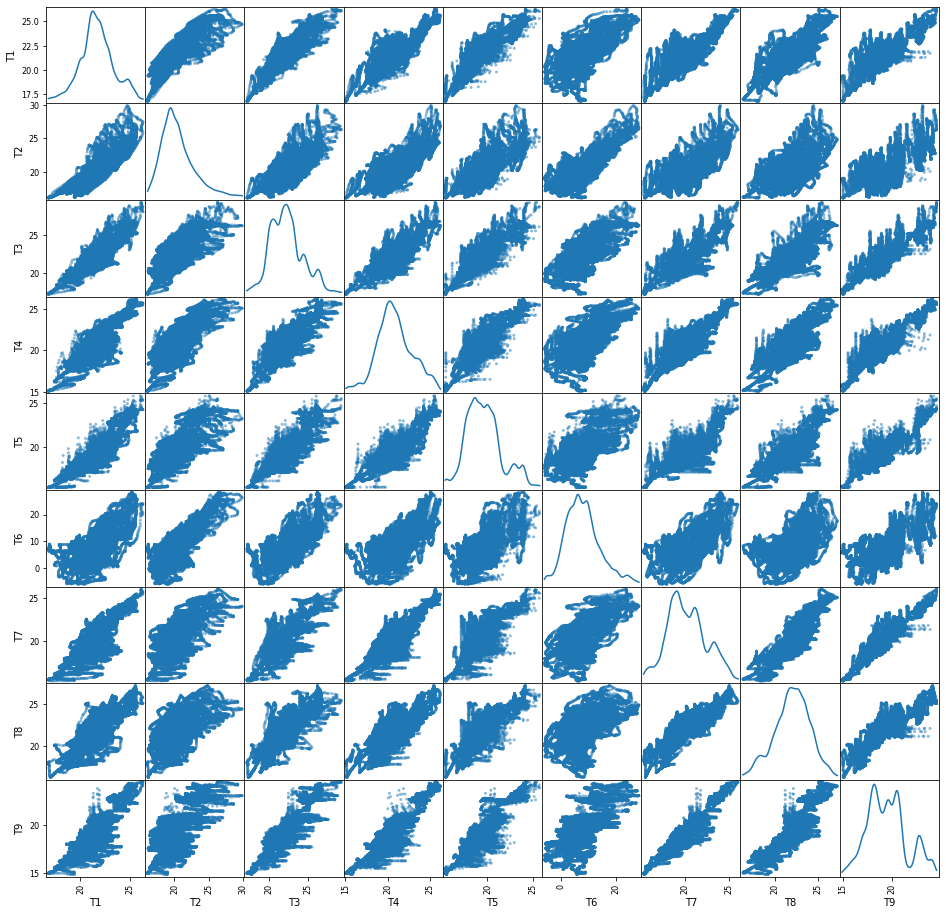

In [8]:
temp_scatter = pd.plotting.scatter_matrix(dfmerge[temp_cols], diagonal="kde", figsize=(16, 16))

From the above, we can see that there is some linear relation between T7 and T9. Others are having the shape but are not exactly linear.

Text(0, 0.5, 'T9')

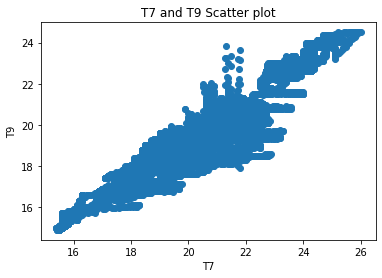

In [9]:
plt.scatter(dfmerge["T7"], dfmerge["T9"])
plt.title("T7 and T9 Scatter plot")
plt.xlabel("T7")
plt.ylabel("T9")

There is a definetly a relation between these two attributes but also have some outliers

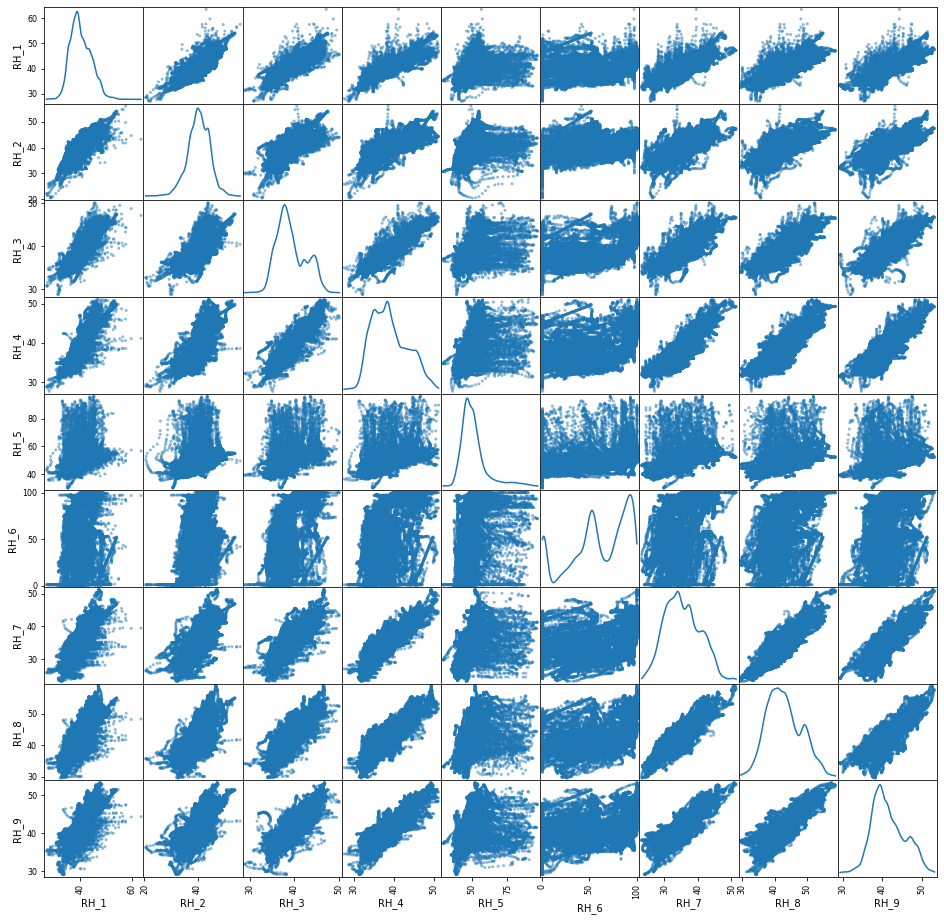

In [10]:
rho_scatter = pd.plotting.scatter_matrix(dfmerge[hum_cols], diagonal="kde", figsize=(16, 16))

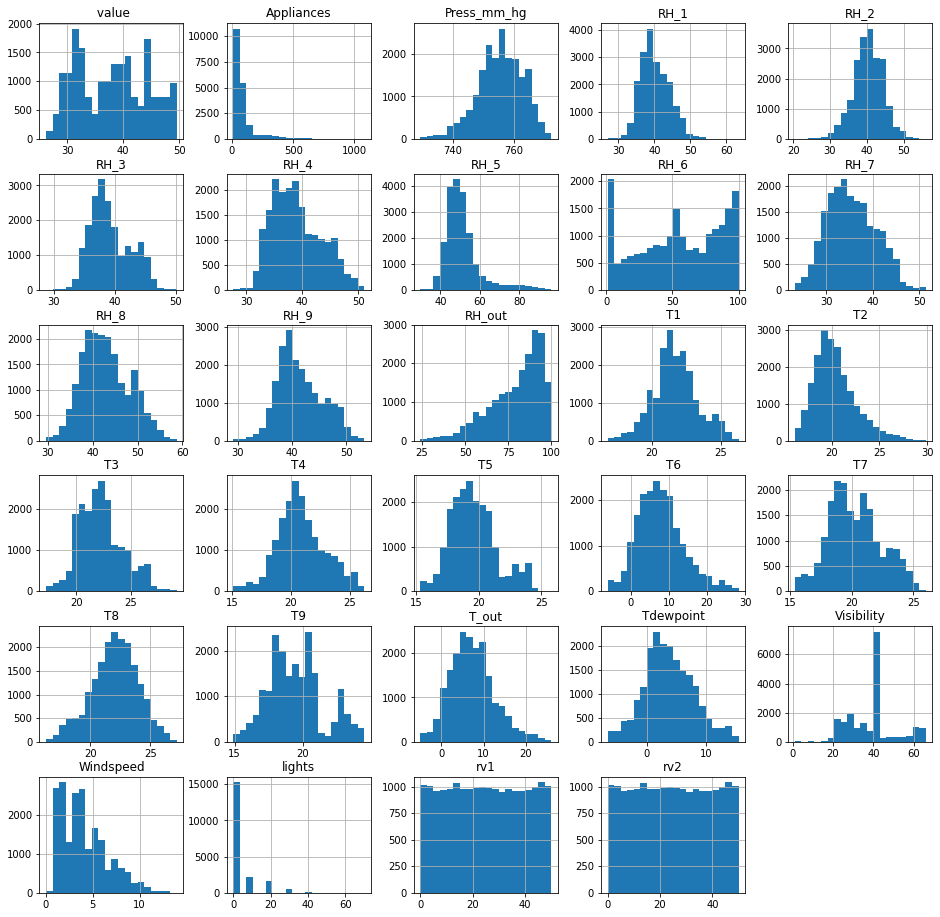

In [11]:
histograms = dfmerge.hist(figsize=(16, 16), bins=20)

All humidity values are almost having normal distribution except RH_6 and RH_out. 
In other words the reading from inside the home is having normal distribution.

All temperature readings follow a Normal distribution except for T9.

Visibility, Windspeed and Appliances are having skewed data.

Target variable, Appliances is highly right skewed.

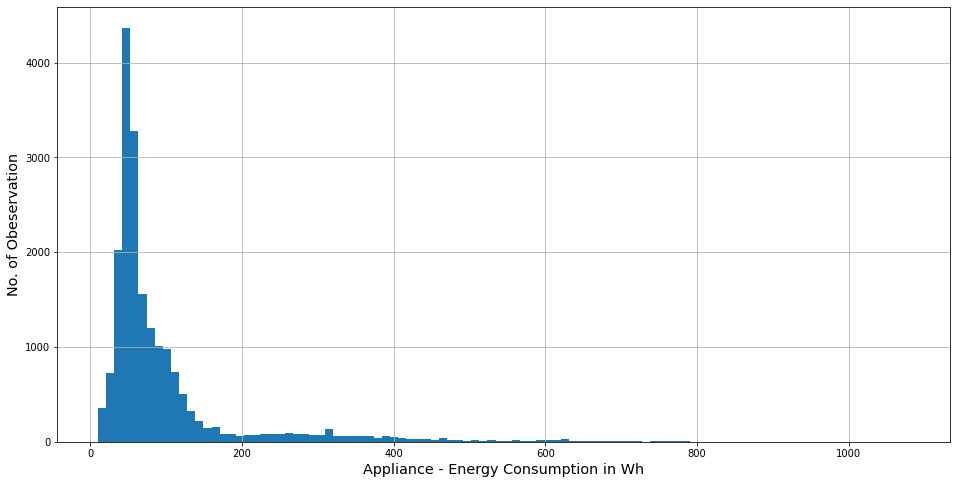

In [12]:
# Target - Appliances (plot histrogram)

plt.xlabel("Appliance - Energy Consumption in Wh", fontsize="x-large")
plt.ylabel("No. of Obeservation", fontsize="x-large")

dfmerge["Appliances"].hist(figsize=(16, 8), bins=100)

In [13]:
dfmerge.columns

Index(['date_x', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', ' value'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of Appliance Feature')

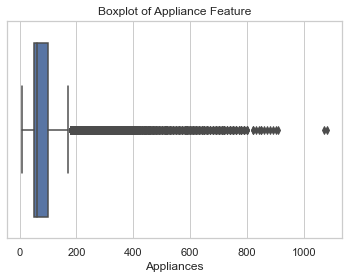

In [14]:
sns.set(style="whitegrid")
sns.boxplot(dfmerge['Appliances']).set_title("Boxplot of Appliance Feature")

## Two records are shown as Outliers from the  above boxplot

In [15]:
print("Percentage of dataset in range of 0-200 Wh is","{:.3f}%".format(
    (dfmerge[dfmerge.Appliances <= 200]["Appliances"].count()*100.0) / dfmerge.shape[0]))

Percentage of dataset in range of 0-200 Wh is 90.291%


# Correlation Plot

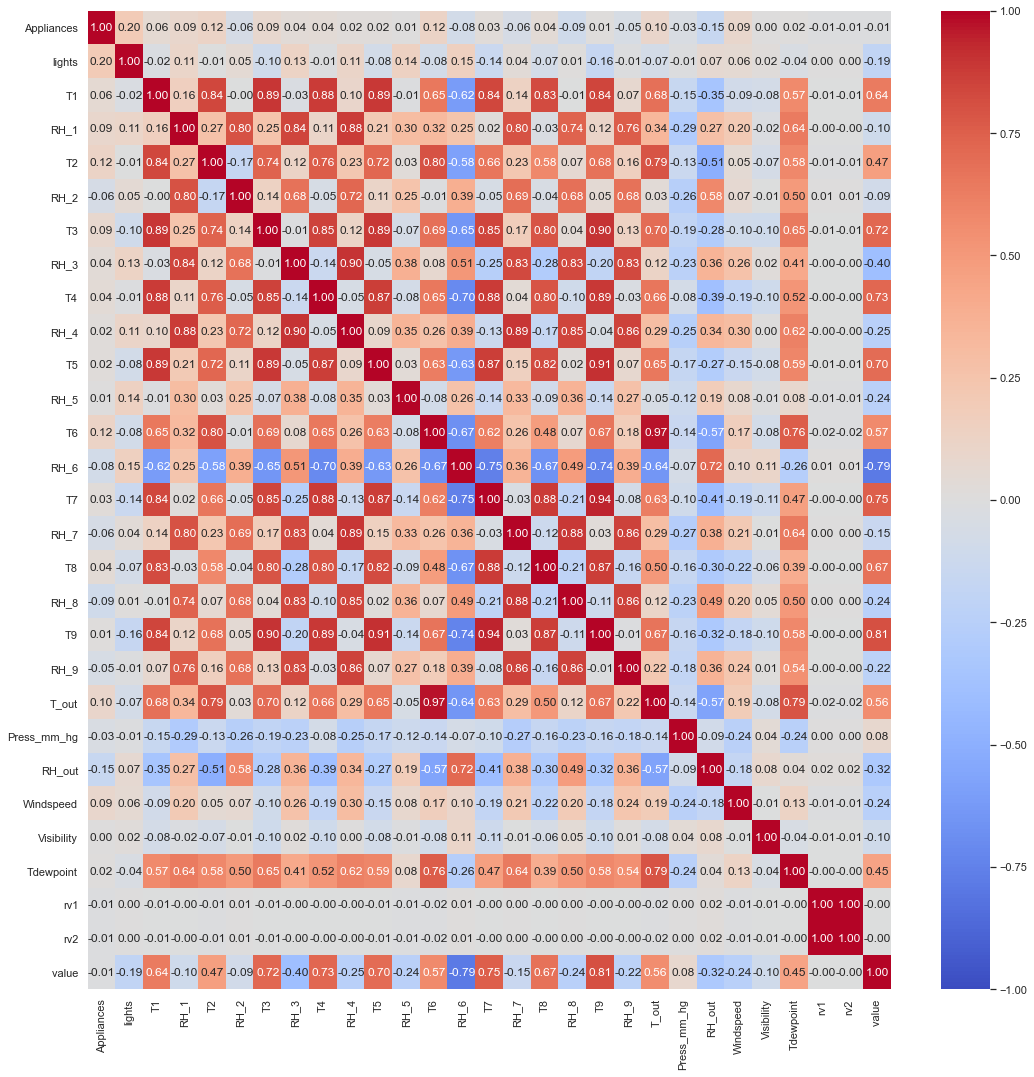

In [16]:
dfmerge_corr = dfmerge.corr()
#dfmerge_corr[np.abs(dfmerge_corr)<.2] = 0
plt.figure(figsize=(18,18))
sns.heatmap(dfmerge_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',fmt = '.2f',
            annot=True);

Text(0.5, 1.0, 'Scatterplot between Appliance and T2')

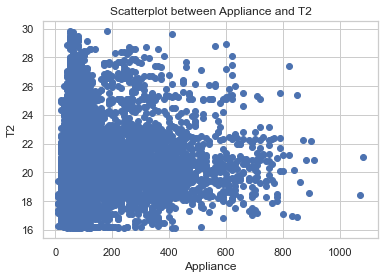

In [17]:
plt.scatter(dfmerge["Appliances"], dfmerge["T2"])
plt.xlabel("Appliance")
plt.ylabel("T2")
plt.title("Scatterplot between Appliance and T2")

Text(0.5, 1.0, 'Scatterplot between Appliance and Lights')

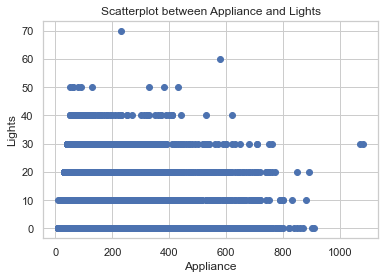

In [18]:
plt.scatter(dfmerge["Appliances"], dfmerge["lights"])
plt.xlabel("Appliance")
plt.ylabel("Lights")
plt.title("Scatterplot between Appliance and Lights")

Text(0.5, 1.0, 'Scatterplot between Appliance and T6')

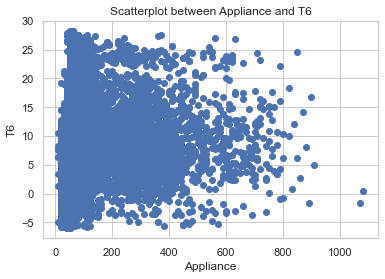

In [19]:
plt.scatter(dfmerge["Appliances"], dfmerge["T6"])
plt.xlabel("Appliance")
plt.ylabel("T6")
plt.title("Scatterplot between Appliance and T6")

Text(0.5, 1.0, 'Scatterplot between Appliance and T_out')

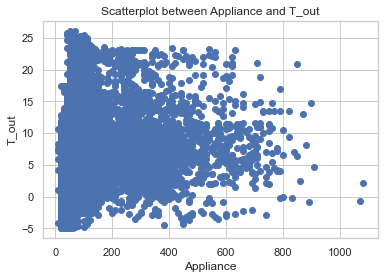

In [20]:
plt.scatter(dfmerge["Appliances"], dfmerge["T_out"])
plt.xlabel("Appliance")
plt.ylabel("T_out")
plt.title("Scatterplot between Appliance and T_out")

# Lets find the high correlation data from dataset

In [21]:
dfmerged = dfmerge.drop('date_x', axis = 1)

In [22]:
# To generate all pairs for given columns
from itertools import combinations
from scipy.stats import pearsonr

for pair in combinations(dfmerged.columns, 2):
    col_1, col_2 = pair
    # Calculate the coefficient and p-value
    corr_coef, p_val = pearsonr(dfmerged[col_1], dfmerged[col_2])
    # Check for high correlation
    if corr_coef > 0.9 or corr_coef < -0.9:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : T3, T9
Correlation coefficient : 0.9013235850825663
p-value : 0.0
Column pair : T5, T9
Correlation coefficient : 0.9110551178067937
p-value : 0.0
Column pair : T6, T_out
Correlation coefficient : 0.9747866900664538
p-value : 0.0
Column pair : T7, T9
Correlation coefficient : 0.9447764235687445
p-value : 0.0
Column pair : rv1, rv2
Correlation coefficient : 1.0
p-value : 0.0


T9 has high correlation with 3 other columns and p-value is close to 0, we can say like T9 is a redundant.

T6 and T_out is highly correlated, T6 is from the outside the house reading 
and T_out is the data collected from weather's site

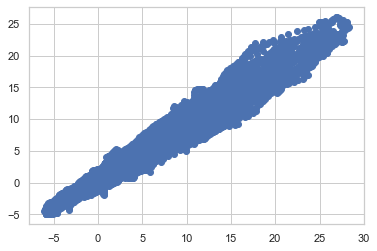

In [23]:
plt.scatter(dfmerge["T6"], dfmerge["T_out"])

Its seems like T6 and T_out is linearly correlated.

In [24]:
# Lowercase the column names
dfmerge.columns = [x.lower() for x in dfmerge.columns]

In [25]:
dfmerge.head(2)

date_x  appliances  lights     t1       rh_1    t2     rh_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.7900   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.7225   

      t3   rh_3    t4  ...   rh_9     t_out  press_mm_hg  rh_out  windspeed  \
0  19.79  44.73  19.0  ...  45.53  6.600000        733.5    92.0   7.000000   
1  19.79  44.79  19.0  ...  45.56  6.483333        733.6    92.0   6.666667   

   visibility  tdewpoint        rv1        rv2   value  
0   63.000000        5.3  13.275433  13.275433   31.41  
1   59.166667        5.2  18.606195  18.606195   31.41  

[2 rows x 30 columns]

In [26]:
# Append more columns to the DataFrame based on datetime
df = dfmerge.copy()
df['dateupdate'] = pd.to_datetime(dfmerge['date_x']).dt.normalize()

In [27]:
# Set datetime index due to time series analysis 
df = df.set_index('dateupdate')

In [28]:
df.head(2)

date_x  appliances  lights     t1       rh_1    t2  \
dateupdate                                                                    
2016-01-11  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2   
2016-01-11  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2   

               rh_2     t3   rh_3    t4  ...   rh_9     t_out  press_mm_hg  \
dateupdate                               ...                                 
2016-01-11  44.7900  19.79  44.73  19.0  ...  45.53  6.600000        733.5   
2016-01-11  44.7225  19.79  44.79  19.0  ...  45.56  6.483333        733.6   

            rh_out  windspeed  visibility  tdewpoint        rv1        rv2  \
dateupdate                                                                   
2016-01-11    92.0   7.000000   63.000000        5.3  13.275433  13.275433   
2016-01-11    92.0   6.666667   59.166667        5.2  18.606195  18.606195   

             value  
dateupdate          
2016-01-11   31.41  
2016-01-11   31.41  

[2 rows x 30 columns]

In [29]:
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['week'] = df.index.week

In [30]:
#log appliances
df['log_appliances'] = np.log(df.appliances)

# Average house temperature and humidity
df['house_temp'] =(df.t1+df.t2+df.t3+df.t4+df.t5+df.t7+df.t8+df.t9)/8
df['house_hum'] =(df.rh_1+df.rh_2+df.rh_3+df.rh_4+df.rh_5+df.rh_7+df.rh_8+df.rh_9)/8

In [31]:
df.head(10)

date_x  appliances  lights         t1       rh_1  \
dateupdate                                                                  
2016-01-11  2016-01-11 17:00:00          60      30  19.890000  47.596667   
2016-01-11  2016-01-11 17:10:00          60      30  19.890000  46.693333   
2016-01-11  2016-01-11 17:20:00          50      30  19.890000  46.300000   
2016-01-11  2016-01-11 17:30:00          50      40  19.890000  46.066667   
2016-01-11  2016-01-11 17:40:00          60      40  19.890000  46.333333   
2016-01-11  2016-01-11 17:50:00          50      40  19.890000  46.026667   
2016-01-11  2016-01-11 18:00:00          60      50  19.890000  45.766667   
2016-01-11  2016-01-11 18:10:00          60      50  19.856667  45.560000   
2016-01-11  2016-01-11 18:20:00          60      40  19.790000  45.597500   
2016-01-11  2016-01-11 18:30:00          70      40  19.856667  46.090000   

               t2       rh_2     t3       rh_3         t4  ...        rv1  \
dateupdate                                                 ...              
2016-01-11  19.20  44.790000  19.79  44.730000  19.000000  ...  13.275433   
2016-01-11  19.20  44.722500  19.79  44.790000  19.000000  ...  18.606195   
2016-01-11  19.20  44.626667  19.79  44.933333  18.926667  ...  28.642668   
2016-01-11  19.20  44.590000  19.79  45.000000  18.890000  ...  45.410389   
2016-01-11  19.20  44.530000  19.79  45.000000  18.890000  ...  10.084097   
2016-01-11  19.20  44.500000  19.79  44.933333  18.890000  ...  44.919484   
2016-01-11  19.20  44.500000  19.79  44.900000  18.890000  ...  47.233763   
2016-01-11  19.20  44.500000  19.73  44.900000  18.890000  ...  33.039890   
2016-01-11  19.20  44.433333  19.73  44.790000  18.890000  ...  31.455702   
2016-01-11  19.23  44.400000  19.79  44.863333  18.890000  ...   3.089314   

                  rv2   value  month  weekday  hour  week  log_appliances  \
dateupdate                                                                  
2016-01-11  13.275433   31.41      1        0     0     2        4.094345   
2016-01-11  18.606195   31.41      1        0     0     2        4.094345   
2016-01-11  28.642668   31.41      1        0     0     2        3.912023   
2016-01-11  45.410389   31.41      1        0     0     2        3.912023   
2016-01-11  10.084097   31.41      1        0     0     2        4.094345   
2016-01-11  44.919484   31.41      1        0     0     2        3.912023   
2016-01-11  47.233763   31.41      1        0     0     2        4.094345   
2016-01-11  33.039890   31.41      1        0     0     2        4.094345   
2016-01-11  31.455702   31.41      1        0     0     2        4.094345   
2016-01-11   3.089314   31.41      1        0     0     2        4.248495   

            house_temp  house_hum  
dateupdate                         
2016-01-11   18.435000  46.742500  
2016-01-11   18.439167  46.672708  
2016-01-11   18.421667  46.562917  
2016-01-11   18.396250  46.468750  
2016-01-11   18.408750  46.462917  
2016-01-11   18.392083  46.420000  
2016-01-11   18.387917  46.375417  
2016-01-11   18.372083  46.350417  
2016-01-11   18.380417  46.361354  
2016-01-11   18.395833  46.478750  

[10 rows x 37 columns]

In [32]:
df.iloc[1000]

date_x            2016-01-18 15:40:00
appliances                         30
lights                              0
t1                            19.3233
rh_1                             41.4
t2                               18.2
rh_2                             41.4
t3                               19.6
rh_3                            40.59
t4                              18.79
rh_4                            38.29
t5                             17.575
rh_5                          55.5675
t6                           0.783333
rh_6                          95.7561
t7                                 19
rh_7                          34.6633
t8                               19.6
rh_8                          41.8633
t9                               17.2
rh_9                            37.79
t_out                       -0.466667
press_mm_hg                   756.867
rh_out                             69
windspeed                     2.33333
visibility                    36.3333
tdewpoint   

In [33]:
df['hour'].unique()

array([0])

In [34]:
# Calculate average energy load per weekday and hour
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

# Average energy consumption per weekday and hour
df['weekday_avg'] = list(map(code_mean(df[:], 'weekday', "appliances").get, df.weekday))
df['hour_avg'] = list(map(code_mean(df[:], 'hour', "appliances").get, df.hour))

In [35]:
df.head(2)

date_x  appliances  lights     t1       rh_1    t2  \
dateupdate                                                                    
2016-01-11  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2   
2016-01-11  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2   

               rh_2     t3   rh_3    t4  ...   value  month  weekday  hour  \
dateupdate                               ...                                 
2016-01-11  44.7900  19.79  44.73  19.0  ...   31.41      1        0     0   
2016-01-11  44.7225  19.79  44.79  19.0  ...   31.41      1        0     0   

            week  log_appliances  house_temp  house_hum  weekday_avg  \
dateupdate                                                             
2016-01-11     2        4.094345   18.435000  46.742500   111.450684   
2016-01-11     2        4.094345   18.439167  46.672708   111.450684   

             hour_avg  
dateupdate             
2016-01-11  97.694958  
2016-01-11  97.694958  

[2 rows x 39 columns]

In [36]:
def daily(x,df=df):
    return df.groupby('weekday')[x].mean()

def monthly(x,df=df):
    return df.groupby('month')[x].mean()
'''
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()
def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)
    '''

"\ndef hourly(x,df=df):\n    return df.groupby('hour')[x].mean()\ndef monthly_daily(x,df=df):\n    by_day = df.pivot_table(index='weekday', \n                                columns=['month'],\n                                values=x,\n                                aggfunc='mean')\n    return round(by_day, ndigits=2)\n    "

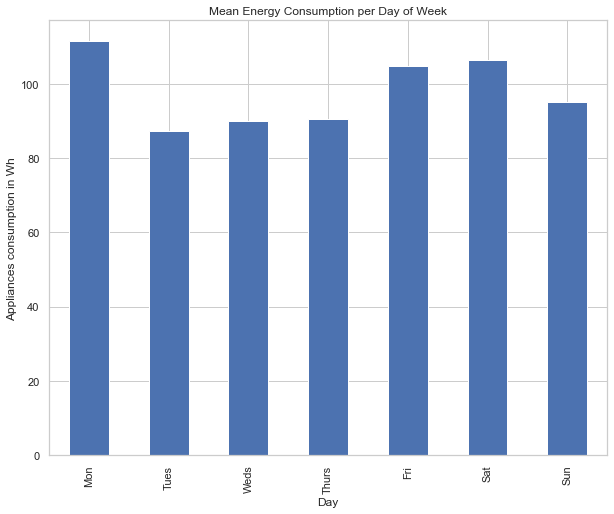

In [37]:
# Plot of Mean Energy Consumption per Day of Week

daily('appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

Monday, the energy consumption has been maximum, followed by Saturday, Firday and Sunday.

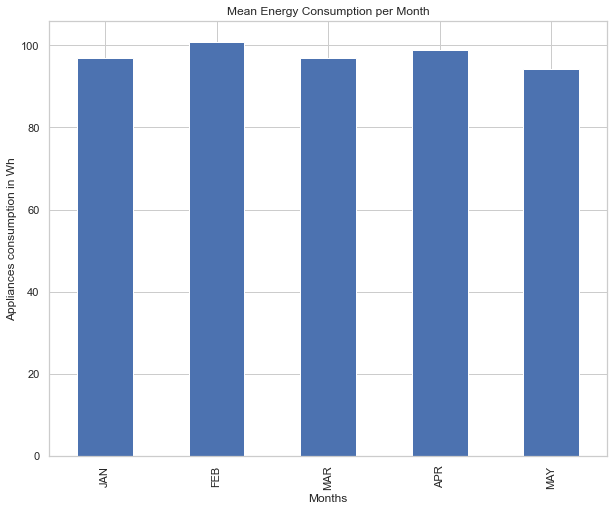

In [38]:
(df.groupby('month')['appliances'].mean()).plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 5, 1)) 
labels = "JAN FEB MAR APR MAY JUN".split()
plt.xlabel('Months')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Month')
plt.xticks(ticks, labels);

Feb month is showing has the highest engergy consumption, rest all the other month consumption seems to be almost close to each other.

Text(0.5, 1.0, 'Energy Consumption per Month over the Time')

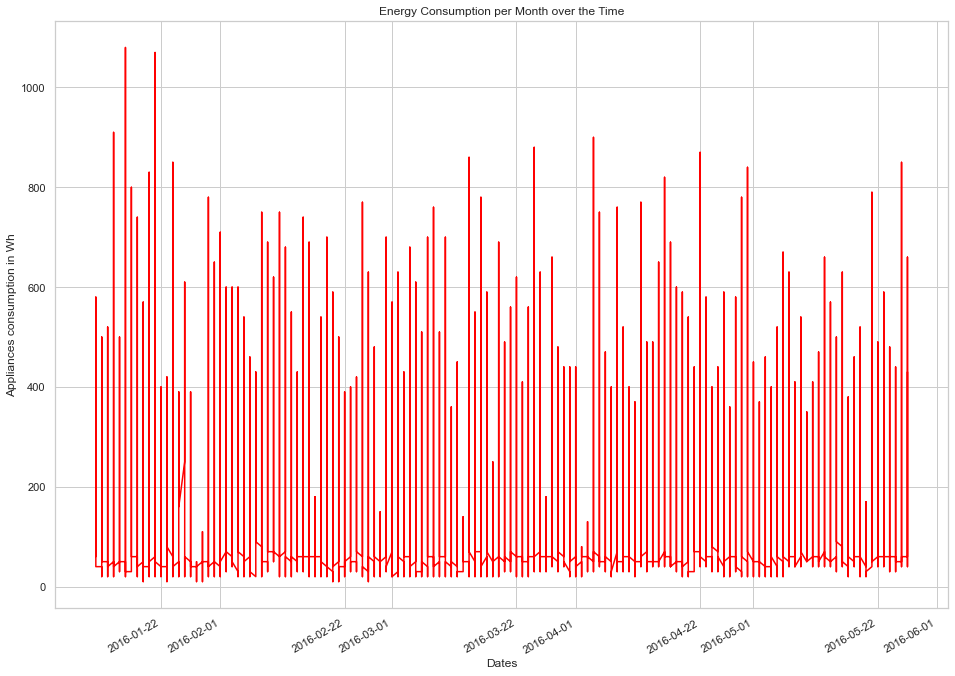

In [39]:
df['appliances'].plot(kind = 'line', figsize=(16,12), color = 'red')
plt.xlabel('Dates')
plt.ylabel('Appliances consumption in Wh')
plt.title('Energy Consumption per Month over the Time')

Text(0.5, 0, 'Appliances log(wH)')

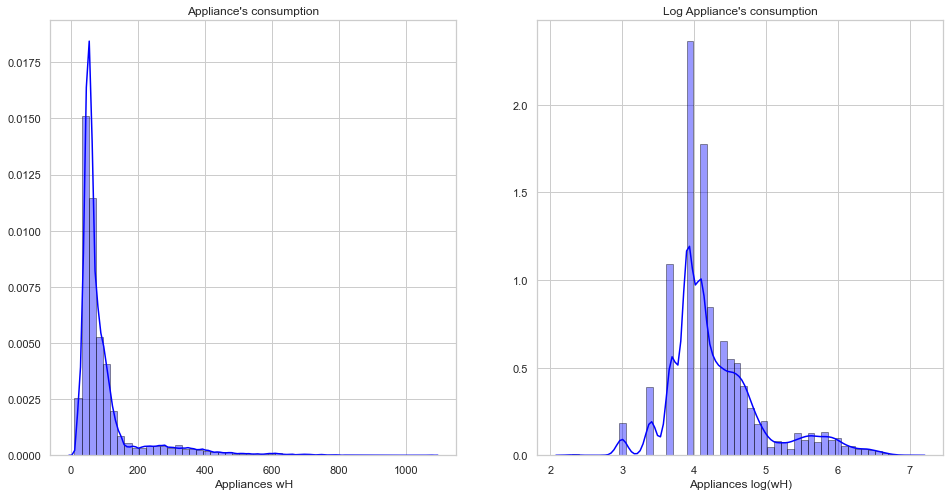

In [40]:
#Histogram of Appliance's consumption

f, axes = plt.subplots(1, 2,figsize=(16,8))

sns.distplot(df.appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's consumption")
axes[0].set_xlabel('Appliances wH')

sns.distplot(df.log_appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Appliance's consumption")
axes[1].set_xlabel('Appliances log(wH)')

In [41]:
df.columns

Index(['date_x', 'appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3',
       'rh_3', 't4', 'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8',
       'rh_8', 't9', 'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed',
       'visibility', 'tdewpoint', 'rv1', 'rv2', ' value', 'month', 'weekday',
       'hour', 'week', 'log_appliances', 'house_temp', 'house_hum',
       'weekday_avg', 'hour_avg'],
      dtype='object')

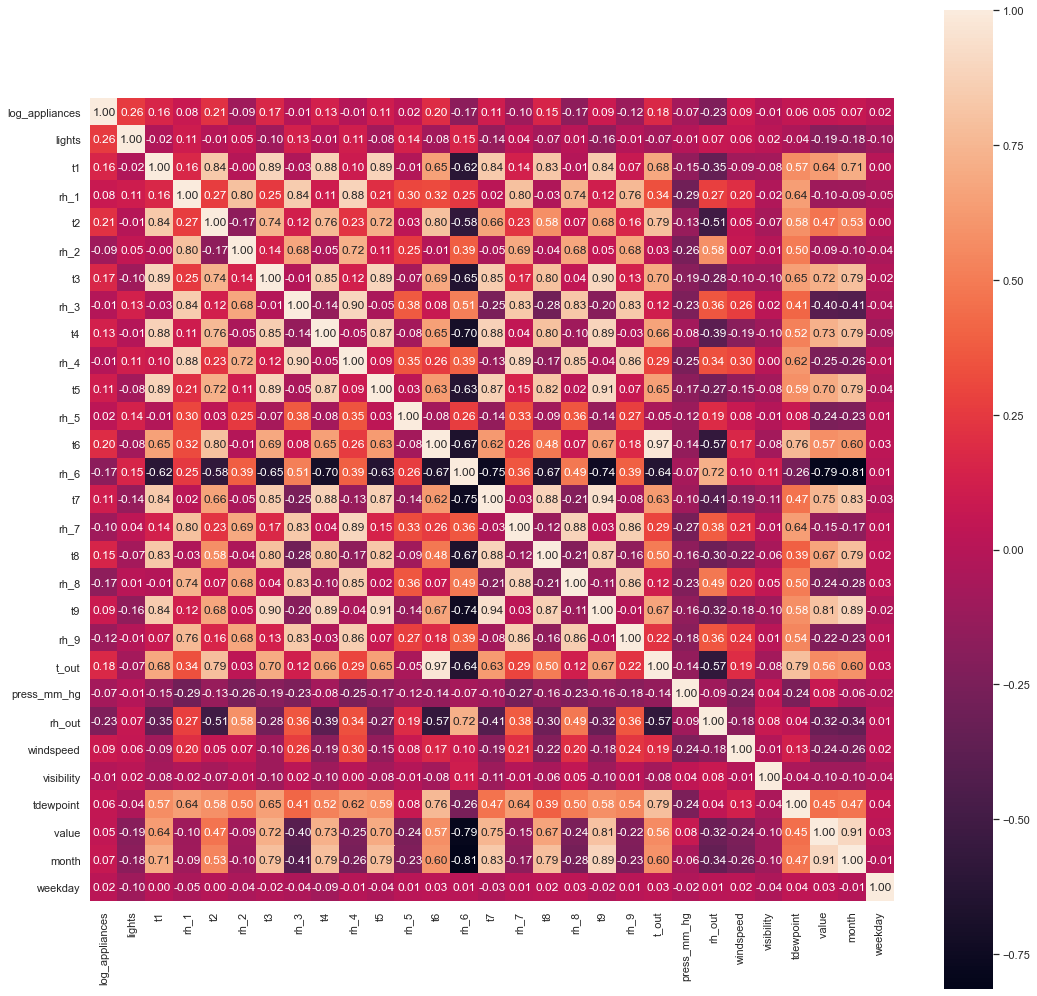

In [42]:

# Pearson Correlation among the variables
col = ['log_appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint',' value', 'month', 'weekday']

corr = df[col].corr()

#corr[np.abs(corr)<0.05] = 0

plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

The most correlated features with energy consumtion(log_appliances) are: lights=0.26, t6=0.20, t2=0.22, t3 = 0.17,t_out = 0.18, rh_out = -0.23, rh_8 = -0.17, rh_6 = -0.17, windspeed = 0.09.

In a linear regression problem only linear independent variables can be be used as features to explain energy consumption otherwise we will have multicolinearity issues.

Text(0.5, 1.0, 'Scatterplot between Appliance and T1')

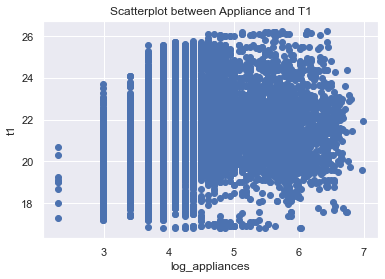

In [43]:
plt.scatter(df["log_appliances"], df["t1"])
plt.xlabel("log_appliances")
plt.ylabel("t1")
plt.title("Scatterplot between Appliance and T1")

Text(0.5, 1.0, 'Scatterplot between Appliance and T1')

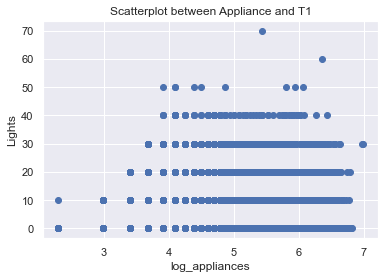

In [44]:
plt.scatter(df["log_appliances"], df["lights"])
plt.xlabel("log_appliances")
plt.ylabel("Lights")
plt.title("Scatterplot between Appliance and T1")

Text(0.5, 1.0, 'Scatterplot between Appliance and T1')

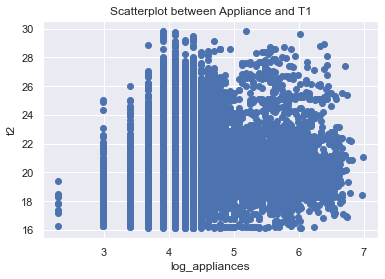

In [45]:
plt.scatter(df["log_appliances"], df["t2"])
plt.xlabel("log_appliances")
plt.ylabel("t2")
plt.title("Scatterplot between Appliance and T1")

Text(0.5, 1.0, 'Scatterplot between Appliance and T1')

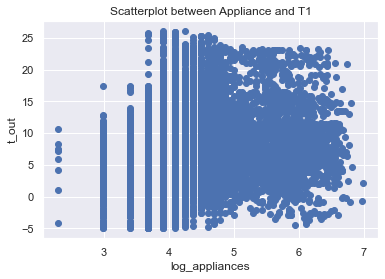

In [46]:
plt.scatter(df["log_appliances"], df["t_out"])
plt.xlabel("log_appliances")
plt.ylabel("t_out")
plt.title("Scatterplot between Appliance and T1")

# Inference - Satistics

In [47]:
# Columns of the dataset
print(dfmerge.columns)
print(df.columns)

Index(['date_x', 'appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3',
       'rh_3', 't4', 'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8',
       'rh_8', 't9', 'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed',
       'visibility', 'tdewpoint', 'rv1', 'rv2', ' value'],
      dtype='object')
Index(['date_x', 'appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3',
       'rh_3', 't4', 'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8',
       'rh_8', 't9', 'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed',
       'visibility', 'tdewpoint', 'rv1', 'rv2', ' value', 'month', 'weekday',
       'hour', 'week', 'log_appliances', 'house_temp', 'house_hum',
       'weekday_avg', 'hour_avg'],
      dtype='object')


In [48]:
# Remove the Log Appliance as we will scale the data.
dfactual = df.drop('log_appliances',axis=1)

In [49]:
# Rename the Value column name
dfactual['value'] = dfactual[' value']
dfactual.drop(' value', axis=1)

date_x  appliances  lights         t1       rh_1  \
dateupdate                                                                  
2016-01-11  2016-01-11 17:00:00          60      30  19.890000  47.596667   
2016-01-11  2016-01-11 17:10:00          60      30  19.890000  46.693333   
2016-01-11  2016-01-11 17:20:00          50      30  19.890000  46.300000   
2016-01-11  2016-01-11 17:30:00          50      40  19.890000  46.066667   
2016-01-11  2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                         ...         ...     ...        ...        ...   
2016-05-27  2016-05-27 17:20:00         100       0  25.566667  46.560000   
2016-05-27  2016-05-27 17:30:00          90       0  25.500000  46.500000   
2016-05-27  2016-05-27 17:40:00         270      10  25.500000  46.596667   
2016-05-27  2016-05-27 17:50:00         420      10  25.500000  46.990000   
2016-05-27  2016-05-27 18:00:00         430      10  25.500000  46.600000   

                   t2       rh_2         t3       rh_3         t4  ...  \
dateupdate                                                         ...   
2016-01-11  19.200000  44.790000  19.790000  44.730000  19.000000  ...   
2016-01-11  19.200000  44.722500  19.790000  44.790000  19.000000  ...   
2016-01-11  19.200000  44.626667  19.790000  44.933333  18.926667  ...   
2016-01-11  19.200000  44.590000  19.790000  45.000000  18.890000  ...   
2016-01-11  19.200000  44.530000  19.790000  45.000000  18.890000  ...   
...               ...        ...        ...        ...        ...  ...   
2016-05-27  25.890000  42.025714  27.200000  41.163333  24.700000  ...   
2016-05-27  25.754000  42.080000  27.133333  41.223333  24.700000  ...   
2016-05-27  25.628571  42.768571  27.050000  41.690000  24.700000  ...   
2016-05-27  25.414000  43.036000  26.890000  41.290000  24.700000  ...   
2016-05-27  25.264286  42.971429  26.823333  41.156667  24.700000  ...   

                  rv2  month  weekday  hour  week  house_temp  house_hum  \
dateupdate                                                                 
2016-01-11  13.275433      1        0     0     2   18.435000  46.742500   
2016-01-11  18.606195      1        0     0     2   18.439167  46.672708   
2016-01-11  28.642668      1        0     0     2   18.421667  46.562917   
2016-01-11  45.410389      1        0     0     2   18.396250  46.468750   
2016-01-11  10.084097      1        0     0     2   18.408750  46.462917   
...               ...    ...      ...   ...   ...         ...        ...   
2016-05-27  43.096812      5        4     0    21   24.869583  46.137881   
2016-05-27  49.282940      5        4     0    21   24.846810  46.089286   
2016-05-27  29.199117      5        4     0    21   24.818571  46.237738   
2016-05-27   6.322784      5        4     0    21   24.758312  46.242246   
2016-05-27  34.118851      5        4     0    21   24.740452  46.190804   

            weekday_avg   hour_avg  value  
dateupdate                                 
2016-01-11   111.450684  97.694958  31.41  
2016-01-11   111.450684  97.694958  31.41  
2016-01-11   111.450684  97.694958  31.41  
2016-01-11   111.450684  97.694958  31.41  
2016-01-11   111.450684  97.694958  31.41  
...                 ...        ...    ...  
2016-05-27   104.622144  97.694958  49.33  
2016-05-27   104.622144  97.694958  49.33  
2016-05-27   104.622144  97.694958  49.33  
2016-05-27   104.622144  97.694958  49.33  
2016-05-27   104.622144  97.694958  49.33  

[19735 rows x 38 columns]

In [50]:
dfactual.head(2)

date_x  appliances  lights     t1       rh_1    t2  \
dateupdate                                                                    
2016-01-11  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2   
2016-01-11  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2   

               rh_2     t3   rh_3    t4  ...   value  month  weekday  hour  \
dateupdate                               ...                                 
2016-01-11  44.7900  19.79  44.73  19.0  ...   31.41      1        0     0   
2016-01-11  44.7225  19.79  44.79  19.0  ...   31.41      1        0     0   

            week  house_temp  house_hum  weekday_avg   hour_avg  value  
dateupdate                                                              
2016-01-11     2   18.435000  46.742500   111.450684  97.694958  31.41  
2016-01-11     2   18.439167  46.672708   111.450684  97.694958  31.41  

[2 rows x 39 columns]

In [51]:
# Create the functions for 
from scipy import stats

def get_sub_plot(width = 20, height = 10, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_joint_plot(x, y, df):
    #ax = get_sub_plot()
    sns.jointplot(x = x, y = y, data = df, kind = 'reg')
    plt.show()
    
def plot_box_plot(x, y, data):
    ax = get_sub_plot()
    sns.boxplot(x = x, y = y, data = df, ax = ax)
    plt.show()

def report_pearson(x, y, data):
    correlation, p = stats.pearsonr(df[x], df[y])
    print('{:10s} {:10.2f} {:10.2f}'.format('pearson', correlation, p))

def report_numerical_x_vs_numerical_y(variables, y, dfactual):
    for var in variables:
        print(var + ':')
        report_pearson(var, y, df)
        plot_joint_plot(var, y, df)

# Variables that are particularly significant in terms of predicting Appliances Target Feature

lights:
pearson          0.20       0.00


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


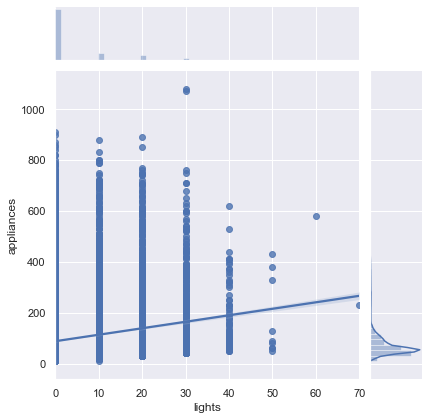

windspeed:
pearson          0.09       0.00


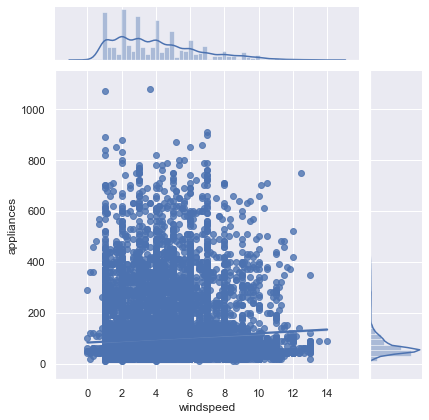

t6:
pearson          0.12       0.00


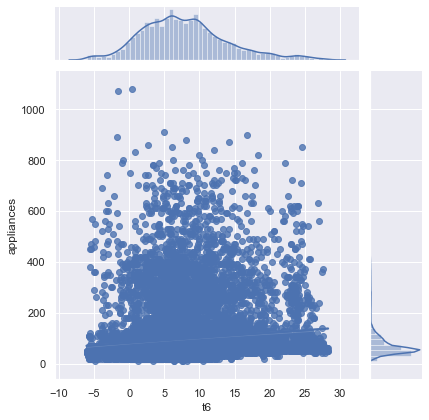

t2:
pearson          0.12       0.00


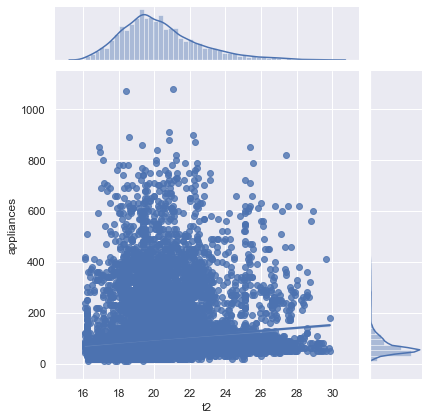

t3:
pearson          0.09       0.00


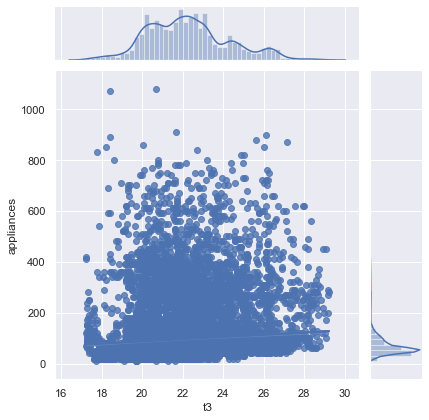

In [52]:
y = 'appliances'
variables = ['lights', 'windspeed', 't6', 't2', 't3']
report_numerical_x_vs_numerical_y(variables, y, dfactual)

In [62]:
# Identify the correlation among themselfs
print("Correlation between T9 and T1")
print(report_pearson('t9', 't1', dfactual))

print("Correlation between T9 and T2")
print(report_pearson('t9', 't2', dfactual))

print("Correlation between T9 and T3")
print(report_pearson('t9', 't3', dfactual))

print("Correlation between T9 and T4")
print(report_pearson('t9', 't4', dfactual))

print("Correlation between T9 and T5")
print(report_pearson('t9', 't5', dfactual))

print("Correlation between T9 and T6")
print(report_pearson('t9', 't6', dfactual))

print("Correlation between T9 and T7")
print(report_pearson('t9', 't7', dfactual))

print("Correlation between T9 and T8")
print(report_pearson('t9', 't8', dfactual))

Correlation between T9 and T1
pearson          0.84       0.00
None
Correlation between T9 and T2
pearson          0.68       0.00
None
Correlation between T9 and T3
pearson          0.90       0.00
None
Correlation between T9 and T4
pearson          0.89       0.00
None
Correlation between T9 and T5
pearson          0.91       0.00
None
Correlation between T9 and T6
pearson          0.67       0.00
None
Correlation between T9 and T7
pearson          0.94       0.00
None
Correlation between T9 and T8
pearson          0.87       0.00
None


# Verify the Statistics, if the Temperature, Humidity and Weather features influences Appliances (Target Feature)

In [57]:
# OLS Model with T3 and Appliance
from statsmodels.formula.api import ols
model = ols('appliances ~ t3', dfactual).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             appliances   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     143.8
Date:                Mon, 18 May 2020   Prob (F-statistic):           5.09e-33
Time:                        21:12:10   Log-Likelihood:            -1.1931e+05
No. Observations:               19735   AIC:                         2.386e+05
Df Residuals:                   19733   BIC:                         2.386e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8955      8.105      0.110      0.9

Coefficient table (middle table). We can interpret the t3 coefficient (4.3471) by first noticing that the p-value (under P>|t|) is so small, basically zero. This means that the t3 is a statisticall significant predictor of appliance energy consumption. 

The regression coefficient for t3 of 4.3471 means that on average, each additional t3 temperature is associated with an increase the appliance energy consumption

The confidence interval gives us a range of plausible values for this average change, about (3.637 and 5.058)

R^2 is only 0.007, hence t3 doesn't contribute much on the variance. F-Statistic The F-Statistic is 143.8 and the probability for this statistic is 5.09e-33, which is close to 0. We can safely reject the null hypothesis, indicating that at least one 𝛽 coefficient is nonzero.

In [59]:
# OLS Model with t3+t6 and Appliance
model = ols('appliances ~ t3+t6', dfactual).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             appliances   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     138.8
Date:                Mon, 18 May 2020   Prob (F-statistic):           1.39e-60
Time:                        21:12:21   Log-Likelihood:            -1.1924e+05
No. Observations:               19735   AIC:                         2.385e+05
Df Residuals:                   19732   BIC:                         2.385e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.5949     10.249      7.181      0.0

Coefficient table (middle table). We can interpret the t3+t6 coefficient (0.4119, 1.8871) by first noticing that the p-value (under P>|t|) is so small, basically zero. This means that the t6 is a statisticall significant predictor of appliance energy consumption. 

The regression coefficient for t6 of 1.8871, means that on average, each additional t6 temperature is associated with an increase the appliance energy consumption

The confidence interval gives us a range of plausible values for this average change, about (1.566 and 2.208)

R^2 is only 0.014, hence t3 and t6 doesn't contribute much on the variance. F-Statistic The F-Statistic is 138.8 and the probability for this statistic is 1.39e-60, which is close to 0. We can safely reject the null hypothesis, indicating that at least one 𝛽 coefficient is nonzero.

In [61]:
# OLS Model with t3+t6+rh_out and Appliance
model = ols('appliances ~ t3+t6+rh_out', dfactual).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             appliances   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     170.3
Date:                Mon, 18 May 2020   Prob (F-statistic):          4.96e-109
Time:                        21:12:55   Log-Likelihood:            -1.1913e+05
No. Observations:               19735   AIC:                         2.383e+05
Df Residuals:                   19731   BIC:                         2.383e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    127.4360     10.790     11.810      0.0

Coefficient table (middle table). We can interpret the t3+t6+rh_out coefficient (1.8057, 0.3079, -0.9076) by first noticing that the p-value (under P>|t|) is so small, basically zero. This means that the t6 is a statisticall significant predictor of appliance energy consumption. 

The regression coefficient for rh_out of -0.9076, means that on average, each additional t6 temperature is associated with an decrease the appliance energy consumption

The confidence interval gives us a range of plausible values for this average change, about (-1.025 and -0.790)

R^2 is only 0.025 better than previous, hence t3, t6 and rh_out doesn't contribute much on the variance. F-Statistic The F-Statistic is 170.3 and the probability for this statistic is 4.96e-109, which is close to 0. We can safely reject the null hypothesis, indicating that at least one 𝛽 coefficient is nonzero.

In [66]:
# OLS Model with t6+t2+rh_2+t3+t3+t5+t7+windspeed+tdewpoint and Appliance
model = ols('appliances ~ t6+t2+rh_2+t3+t3+t5+t7+windspeed+tdewpoint', dfactual).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             appliances   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     153.6
Date:                Mon, 18 May 2020   Prob (F-statistic):          4.26e-252
Time:                        21:16:50   Log-Likelihood:            -1.1878e+05
No. Observations:               19735   AIC:                         2.376e+05
Df Residuals:                   19726   BIC:                         2.377e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.0723     19.218     -6.612      0.0

Coefficient table (middle table). We can interpret the t6+t2+rh_2+t3+t3+t5+t7+windspeed+tdewpoint, coefficient (4.3798, 5.4276, 2.2627,17.0026,-10.9738,-7.5650,2.0109,-8.0189) by first noticing that the p-value (under P>|t|) is so small, basically zero. This means that the t6 is a statisticall significant predictor of appliance energy consumption. 

The confidence interval of tdewpoint gives us a range of plausible values for this average change, about (-8.881 and -7.157)

R^2 is only 0.059 better than previous, hence t3, t6 and rh_out doesn't contribute much on the variance. F-Statistic The F-Statistic is 153.6 and the probability for this statistic is 4.26e-252, which is close to 0. We can safely reject the null hypothesis, indicating that at least one 𝛽 coefficient is nonzero.

In [80]:
# OLS Model with t1+t2+t3+t4+t5+t6+t7+t8 and Appliance
model = ols('appliances ~ t1+t2+t3+t4+t5+t6+t7+t8', dfactual).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             appliances   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 18 May 2020   Prob (F-statistic):          2.92e-197
Time:                        21:26:52   Log-Likelihood:            -1.1891e+05
No. Observations:               19735   AIC:                         2.378e+05
Df Residuals:                   19726   BIC:                         2.379e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.9017     12.371      4.923      0.0

In [102]:
# OLS Model with t1+t2+t3+t4+t5+t6+t7+t8+rh_1+rh_2+windspeed and Appliance
model = ols('appliances ~ t1+t2+t3+t4+t5+t6+t7+t8+rh_1+rh_2+windspeed', dfactual).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             appliances   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        21:35:34   Log-Likelihood:            -1.1836e+05
No. Observations:               19735   AIC:                         2.367e+05
Df Residuals:                   19723   BIC:                         2.368e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    123.2455     15.477      7.963      0.0

Coefficient table (middle table). We can interpret the t1+t2+t3+t4+t5+t6+t7+t8+rh_1+rh_2+windspeed, coefficient (9.0446, -25.6614, 17.7293,-1.4768,-7.3830,-7.5650,1.0356,-6.2685,9.4475,20.0347,-20.3286,1.6784) by first noticing that the p-value (under P>|t|) is so small, basically zero. This means that the t6 is a statisticall significant predictor of appliance energy consumption. 

The confidence interval of t3 gives us a range of plausible values for this average change, about (15.814 and 19.644)

R^2 is only 0.098 better than previous, F-Statistic The F-Statistic is 194.5 and the probability for this statistic is 0. We can safely reject the null hypothesis, indicating that at least one 𝛽 coefficient is nonzero.

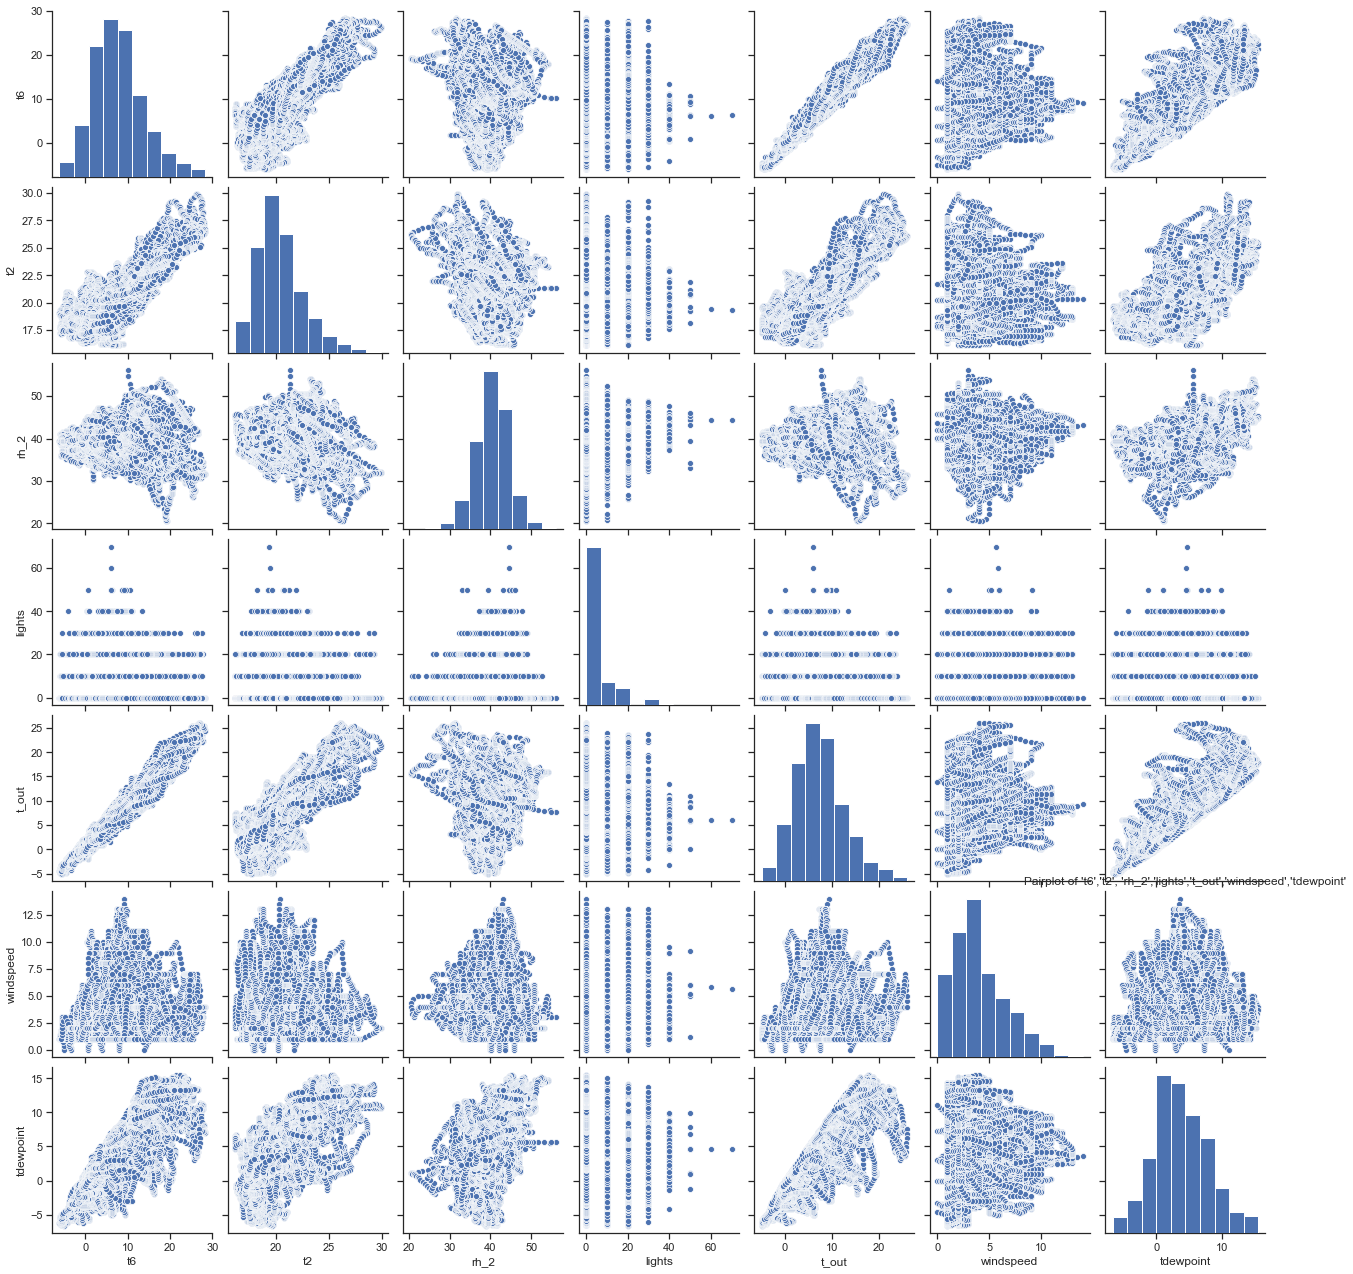

In [294]:
#lights=0.26, t6=0.20, t2=0.22, t3 = 0.17,t_out = 0.18, rh_out = -0.23, rh_8 = -0.17, 
#rh_6 = -0.17, windspeed = 0.09.

col = ['t6','t2', 'rh_2','lights','t_out','windspeed','tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(dfactual[col])
plt.title("Pairplot of 't6','t2', 'rh_2','lights','t_out','windspeed','tdewpoint'")
plt.show();

# Is there a significant difference between T6 and T_out and impact my future Prediction Models

In [63]:
dfactual[['t6', 't_out']].describe()

t6         t_out
count  19735.000000  19735.000000
mean       7.910939      7.411665
std        6.090347      5.317409
min       -6.065000     -5.000000
25%        3.626667      3.666667
50%        7.300000      6.916667
75%       11.256000     10.408333
max       28.290000     26.100000

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


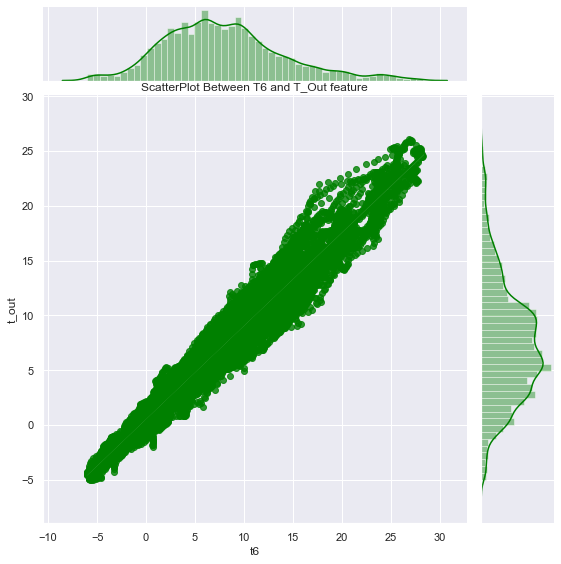

In [293]:
sns.jointplot(x="t6", y="t_out", data=dfactual, kind='reg', color='green', size=8)
plt.title("ScatterPlot Between T6 and T_Out feature")
plt.show()

### It seems like there is linear relation between 'T6' and T_out'

# To find the Corelation between all the Features and Target - Appliances

In [263]:
dfactual.columns

Index(['date_x', 'appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3',
       'rh_3', 't4', 'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8',
       'rh_8', 't9', 'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed',
       'visibility', 'tdewpoint', 'rv1', 'rv2', ' value', 'month', 'weekday',
       'hour', 'week', 'house_temp', 'house_hum', 'weekday_avg', 'hour_avg',
       'value'],
      dtype='object')

In [282]:
dfnew = dfactual.drop(['date_x', 'rv1', 'rv2', ' value','hour','hour_avg'], axis=1)

In [283]:
dfnew.columns

Index(['appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint', 'month', 'weekday', 'week', 'house_temp', 'house_hum',
       'weekday_avg', 'value'],
      dtype='object')

In [266]:
from scipy.stats import pearsonr
columnname = []
corevalue = []
pvalue = []
for i in dfnew.columns:
    corr_coef, p_val = pearsonr(dfnew[i], dfnew["appliances"])
    #print("Corelation between", i , 'and Appliance')
    #print("Correlation coefficient : {}".format(corr_coef))
    #print("p-value : {}".format(p_val))
    columnname.append(i)
    corevalue.append(corr_coef)
    pvalue.append(p_val)
    
dfcorpval = pd.DataFrame(index=columnname, 
                    data = {
                            "Correlation coefficients": corevalue,
                            "p-value": pvalue,
                      }
                  )

In [147]:
dfcorpval.sort_values(by='Correlation coefficients', ascending=False)

Correlation coefficients        p-value
appliances                   1.000000   0.000000e+00
lights                       0.197278  2.305108e-172
t2                           0.120073   2.784947e-64
t6                           0.117638   9.333867e-62
t_out                        0.099155   2.624854e-44
windspeed                    0.087122   1.456471e-34
rh_1                         0.086031   9.639431e-34
weekday_avg                  0.085900   1.208067e-33
t3                           0.085060   5.086416e-33
t1                           0.055447   6.449169e-15
house_temp                   0.054740   1.411780e-14
t4                           0.040281   1.507881e-08
t8                           0.039572   2.683103e-08
rh_3                         0.036292   3.402540e-07
t7                           0.025801   2.890302e-04
t5                           0.019760   5.503451e-03
rh_4                         0.016965   1.715603e-02
tdewpoint                    0.015353   3.102113e-02
t9                           0.010010   1.596635e-01
rh_5                         0.006955   3.286027e-01
weekday                      0.003060   6.672580e-01
visibility                   0.000230   9.741858e-01
week                        -0.011356   1.106606e-01
month                       -0.011606   1.030264e-01
value                       -0.013535   5.725207e-02
house_hum                   -0.020075   4.799007e-03
press_mm_hg                 -0.034885   9.493922e-07
rh_9                        -0.051462   4.697109e-13
rh_7                        -0.055642   5.187296e-15
rh_2                        -0.060465   1.873022e-17
rh_6                        -0.083178   1.209481e-31
rh_8                        -0.094039   5.211566e-40
rh_out                      -0.152282  1.077516e-102

# Create a New Dataframe to conducting T-Statistics

In [284]:
dfttest = dfactual[['lights', 'appliances']]

In [285]:
dfttest.head(5)

lights  appliances
dateupdate                    
2016-01-11      30          60
2016-01-11      30          60
2016-01-11      30          50
2016-01-11      40          50
2016-01-11      40          60

In [286]:
#dfttest['lights'].values[dfttest['lights'] >= 40] = 1
#dfttest['lights'].values[dfttest['lights'] < 39] = 0

#dfttest.loc[dfttest['lights']>=40, 'lights']=1
#dfttest.loc[dfttest['lights']<39, 'lights']=0

dfttest['lights'] = (dfttest['lights'] >=40).astype(int)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [287]:
dfttest.head()

lights  appliances
dateupdate                    
2016-01-11       0          60
2016-01-11       0          60
2016-01-11       0          50
2016-01-11       1          50
2016-01-11       1          60

In [291]:
#leverage the Python stats package for ease
stats.ttest_ind(dfttest['appliances'], dfttest['lights'])

Ttest_indResult(statistic=133.85712343288344, pvalue=0.0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


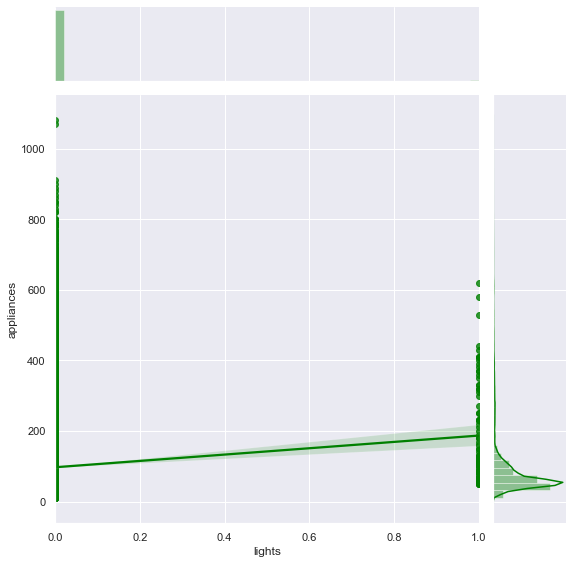

In [290]:
sns.jointplot(x="lights", y="appliances", data=dfttest, kind='reg', color='green', size=8);

The T-Statistics is 133.85 and pvalue is 0, hence we can reject the null hypothesis and conclude that there is a statiscally significant difference.

# Inference as Below - 

Temperature - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoortemperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values

Humidity - There are no significantly high correlation cases (> 0.9) for humidity sensors.

Random variables have no role to play

# Model & Prediction Approach

## Lets define a baseline against which we build other models and compare the accuracy and perfomance - 

In [53]:
from sklearn.linear_model import LinearRegression
from time import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

"""'date_x', 'appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3',
       'rh_3', 't4', 'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8',
       'rh_8', 't9', 'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed',
       'visibility', 'tdewpoint', 'rv1', 'rv2', ' value', 'month', 'weekday',
       'hour', 'week', 'log_appliances', 'house_temp', 'house_hum',
       'weekday_avg', 'hour_avg'
"""
dfactual['value'] = dfactual[' value']
dfactual.drop(' value', axis=1, inplace = True)

X = dfactual.drop(['date_x', 'appliances','rv1', 'rv2','t6','t9'], axis=1)
y = dfactual["appliances"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


# Initialize and fit the model
benchmark_model = LinearRegression()
start = time()
benchmark_model.fit(X_train, y_train)
end = time()

y_pred = benchmark_model.predict(X_test)
timelinear = end-start
print("Classifier fitted in {:.3f} seconds".format(end-start))

# Compute and print R^2 and RMSE
print("R^2: {:.3f}".format(benchmark_model.score(X_test, y_test)*100))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error: {:.3f}".format(rmse))

Classifier fitted in 0.202 seconds
R^2: 16.678
Root Mean Squared Error: 92.652


## K-Fold CV comparison

In [54]:
cv5 = cross_val_score(benchmark_model, X_train, y_train, cv=5)
# Print the 5-fold cross-validation scores
print(cv5)

print("Average 5-Fold CV Score: {}".format(np.mean(cv5)))
print()
cv10 = cross_val_score(benchmark_model, X_train, y_train, cv=10)
# Print the 10-fold cross-validation scores
print(cv10)

print("Average 10-Fold CV Score: {}".format(np.mean(cv10)))

[0.11945252 0.18596483 0.17729608 0.15143344 0.18476264]
Average 5-Fold CV Score: 0.16378190055186861

[0.11837952 0.12052544 0.18454178 0.18941428 0.16061813 0.19884144
 0.13440485 0.17477997 0.17973161 0.19508757]
Average 10-Fold CV Score: 0.16563245972749235


## Data Processing

In [55]:
from sklearn.preprocessing import StandardScaler

# Scales the data to zero mean and unit variance
standard_scaler = StandardScaler()

In [56]:
# Create dummy dataframes to hold the scaled train and test data
dfactual_wdate = dfactual.drop(['date_x'], axis=1)

dfactual_scaled = pd.DataFrame(columns=dfactual_wdate.columns, index=dfactual.index)

In [57]:
# Store the scaled data in new dataframes
dfactual_scaled[dfactual_scaled.columns] = standard_scaler.fit_transform(dfactual_wdate)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
X_scaled = dfactual_scaled.drop(['appliances','rv1', 'rv2','t6','t9'], axis=1)
y_scaled = dfactual_scaled["appliances"]

# Create training and test sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y_scaled, test_size = 0.3, random_state=42)

# Model Implementation 

## Algorithms to be used

### Regularized Linear models as an improvement over Linear Regression.

* Ridge Regression


* Lasso Regression


### Ensemble based Tree Regression models to deal robustly with outlier data and large number of features.

* Random Forests


* Gradient Boosting


* Extra Trees


### Neural networks for exploring non linear relationships between features and target.

* Multi-Layer Preceptron

### Create Functions

In [59]:
from sklearn.metrics import mean_squared_error

# Function to fit the regressor and record its metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    # Dictionary to hold the properties
    reg_props = {}
    
    # Initialize and fit the regressor while recording the time taken for fitting
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train, y_train)
    end = time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    
    return reg_props

In [60]:
# Import the required Regression algorithms
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR 

# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        Lasso,
        RandomForestRegressor,
        GradientBoostingRegressor,
        ExtraTreesRegressor,
        MLPRegressor
    ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train_s, y_train_s, X_test_s, y_test_s, random_state=seed)
        props.append(properites)
        
    return props

In [61]:
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training times": train_times,
                            "Training scores": train_scores,
                            "Testing scores": test_scores,
                            "RMSE": rmse_vals
                      }
                  )
    
    return df

In [62]:
# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [63]:
# Calculate RMSE for the Benchmark model/ Linear Regression
# Store the scaled data in new dataframes

# Initialize and fit the model
benchmark_model = LinearRegression()
start = time()
benchmark_model.fit(X_train_s, y_train_s)
end = time()

y_pred = benchmark_model.predict(X_test_s)
timelinear = end-start

rmse = np.sqrt(mean_squared_error(y_test_s,y_pred))

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "RMSE": rmse,
        "Training scores": benchmark_model.score(X_train_s, y_train_s),
        "Testing scores" :benchmark_model.score(X_test_s, y_test_s),
        "Training times": timelinear,
        "Name": "Linear Regression (Benchmark)"
    }
    ).to_frame().T.set_index(["Name"])]
)

In [64]:
#properties.drop(properties.index, inplace=True)
properties.sort_values(by='RMSE', ascending=True)

Training times Training scores Testing scores  \
ExtraTreesRegressor                  1.17611               1       0.543191   
RandomForestRegressor                3.77174        0.904629        0.44562   
MLPRegressor                         27.5945        0.531666       0.383224   
GradientBoostingRegressor            3.14327        0.357163       0.265424   
Ridge                                1.07003        0.170043       0.166668   
Linear Regression (Benchmark)       0.036299        0.169898       0.166489   
Lasso                               0.756488               0   -1.15367e-06   

                                   RMSE  
ExtraTreesRegressor            0.669149  
RandomForestRegressor          0.737156  
MLPRegressor                   0.777534  
GradientBoostingRegressor      0.848543  
Ridge                          0.903784  
Linear Regression (Benchmark)  0.903881  
Lasso                          0.990047

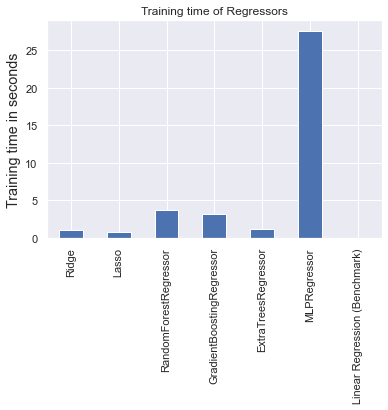

In [65]:
# Plot to compare the training time of algorithms
plt.ylabel("Training time in seconds", fontsize="large")
properties["Training times"].plot(kind="bar", title="Training time of Regressors")

Text(0, 0.5, 'R2 Score/ RMSE')

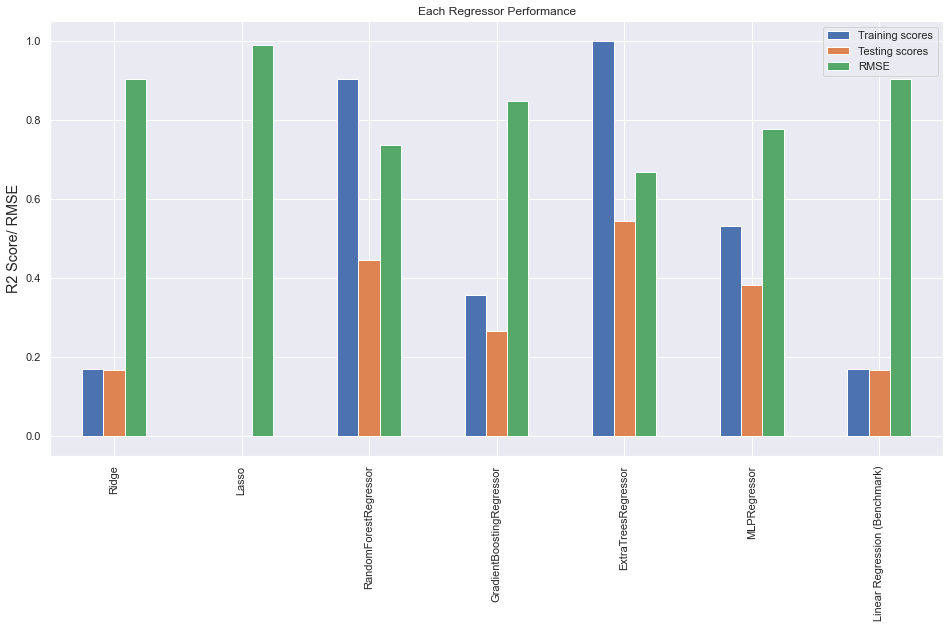

In [66]:
# Plot to compare the performance of the algorithms on datasets
ax= properties[["Training scores", "Testing scores", "RMSE"]].plot(kind="bar", title="Each Regressor Performance", figsize=(16, 8))
ax.set_ylabel("R2 Score/ RMSE", fontsize="large")

* Least performing Regressor - Lasso Regressor
* Best performing Regressor - Extra Trees Regressor


Even though Extra Trees Regressor has a R2 score of 1.0 on traininig set, which might suggest overfitting but, it has the highest score on test set and also, it's RMSE value is also the lowest. Clearly, ExtraTreesRegressor is the best model out of given models.

## Hyperparameter Tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the best performing regressor
clf = ExtraTreesRegressor(random_state=seed)

# Define the parameter subset
param_grid = {
    "n_estimators": [10, 50, 100, 200, 250],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 10, 50, 100, 200, 500]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=20, scoring="r2", cv=5, n_jobs=-1, verbose=2, random_state=seed)
grid_search.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=79, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [10, 50, 100, 200, 250], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 10, 50, 100, 200, 500]},
          pre_dispatch='2*n_jobs', random_state=79, refit=True,
          return_train_score='warn', scoring='r2', verbose=2)

In [68]:
# Display best params
print("Parameters of best Regressor : {}".format(grid_search.best_params_))

Parameters of best Regressor : {'n_estimators': 250, 'max_features': 'log2', 'max_depth': None}


In [69]:
best_model = grid_search.best_estimator_

# Display metrics on training and test set
print("R2 score on Training set = {:.3f}".format(best_model.score(X_train_s, y_train_s)))
print("RMSE on Training set = {:.3f}".format(np.sqrt(mean_squared_error(y_train_s, best_model.predict(X_train_s)))))
print("R2 score on Testing set = {:.3f}".format(best_model.score(X_test_s, y_test_s)))
print("RMSE on Testing set = {:.3f}".format(np.sqrt(mean_squared_error(y_test_s, best_model.predict(X_test_s)))))

R2 score on Training set = 1.000
RMSE on Training set = 0.000
R2 score on Testing set = 0.627
RMSE on Testing set = 0.605


In [70]:
grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='log2', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
          oob_score=False, random_state=79, verbose=0, warm_start=False)

Text(0, 0.5, 'True Values')

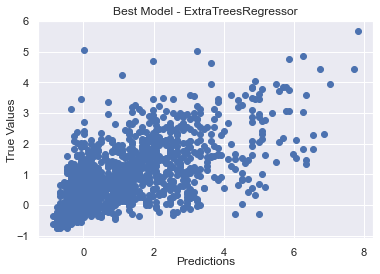

In [71]:
plt.scatter(y_test_s, best_model.predict(X_test_s))
plt.title('Best Model - ExtraTreesRegressor')
plt.xlabel('Predictions', ha='center', va='center')
plt.ylabel('True Values', ha='center', va='center')


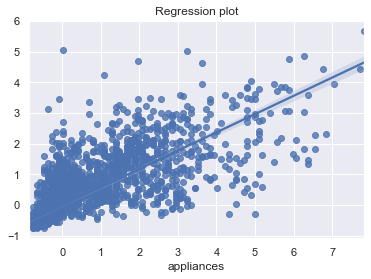

In [72]:
sns.regplot(y_test_s, best_model.predict(X_test_s))
plt.title("Regression plot")
plt.show()

Text(0.5, 1.0, 'Prediction Values')

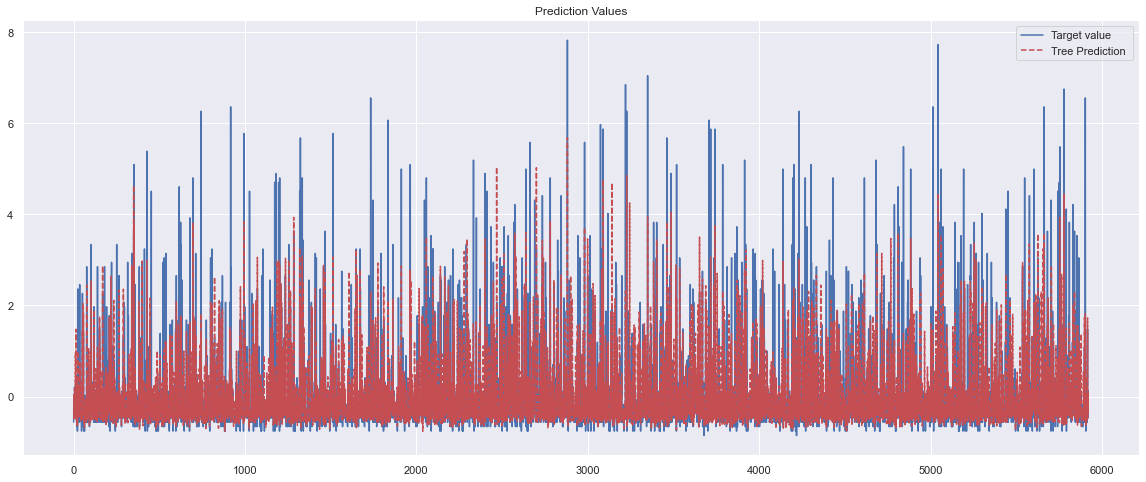

In [73]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test_s.values,label='Target value',color='b')
plt.plot(best_model.predict(X_test_s),label='Tree Prediction ', linestyle='--', color='r')
plt.legend(loc=1)
plt.title("Prediction Values")

In [74]:
print(0.629 - 0.166489)
print((0.603 - 0.903881)*-1)
print(0.629 - 0.543191)
print((0.603-0.669149)*-1)

0.462511
0.30088100000000007
0.08580900000000002
0.06614900000000001


### Interpretation from Implementation - 

1. **R2 score improvement compared to Benchmark model = 0.463.**

2. **RMSE improvement compared to Benchmark model = 0.301.**

3. **R2 score improvement compared to without tuned model = 0.086.**

4. **RMSE improvement compared to without tuned model = 0.066.**

## Feature Analysis

In [75]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(X_train_s.columns[np.argmax(best_model.feature_importances_)]))
print("Least important feature = {}".format(X_train_s.columns[np.argmin(best_model.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(best_model.feature_importances_)

print("\nTop 5 most important features:-")
# Reverse the array to get important features at the beginning
for index in feature_indices[::-1][:5]:
    print(X_train_s.columns[index])
    
print("\nTop 5 least important features:-")
for index in feature_indices[:5]:
    print(X_train_s.columns[index])

Most important feature = rh_out
Least important feature = hour

Top 5 most important features:-
rh_out
rh_1
lights
rh_8
rh_2

Top 5 least important features:-
hour
hour_avg
month
weekday
week


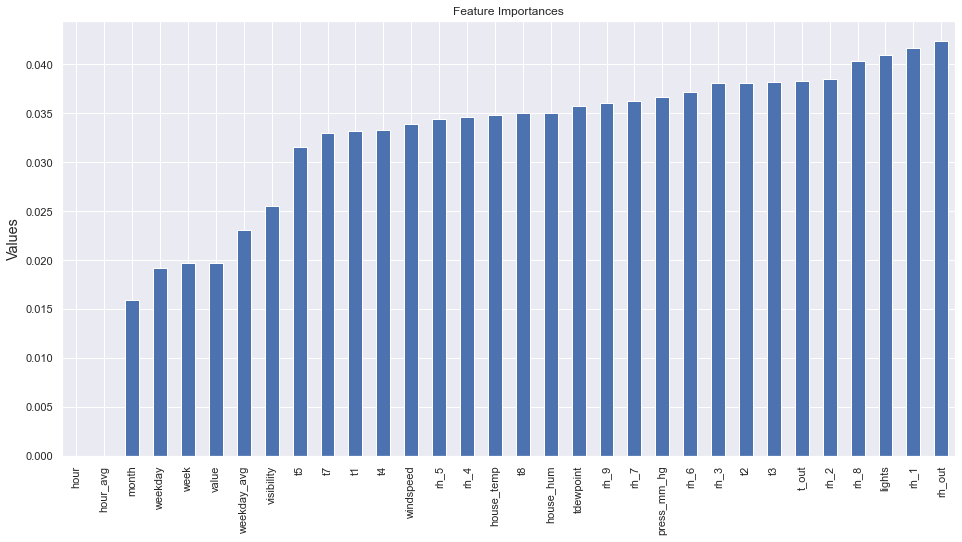

In [76]:
# Plot feature importance

fi = pd.DataFrame(index=X_train_s.columns[feature_indices], data=np.sort(best_model.feature_importances_))

ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

In [77]:
# Constructing data set from reduced feature space
X_train_reduced = X_train_s[X_train_s.columns[feature_indices[::-1][:8]]]
X_test_reduced = X_test_s[X_test_s.columns[feature_indices[::-1][:8]]]

In [78]:
X_train_reduced.columns

Index(['rh_out', 'rh_1', 'lights', 'rh_8', 'rh_2', 't_out', 't3', 't2'], dtype='object')

In [79]:
X_test_reduced.columns

Index(['rh_out', 'rh_1', 'lights', 'rh_8', 'rh_2', 't_out', 't3', 't2'], dtype='object')

In [80]:
from sklearn.base import clone

# Clone the best model
reg_best = clone(best_model)
# Fit the model on reduced data set 
reg_best.fit(X_train_reduced, y_train_s)
print("R2 Score on testing dataset = {:.3f}".format(reg_best.score(X_test_reduced, y_test_s)))
print("RMSE Score on testing dataset = {:.3f}".format(np.sqrt(mean_squared_error(y_test_s, reg_best.predict(X_test_reduced)))))

R2 Score on testing dataset = 0.519
RMSE Score on testing dataset = 0.686


* R2 Score on testing dataset = 0.52
* RMSE Score on testing dataset = 0.69

* Difference in R2 score = 0.109 or 11% loss of explained variance.
* Increase in RMSE = 0.083

The model has not performed better with reduced number of features.

### Conclusion

* Best Algorithm is ExtraTreesRegressor.
* Top 5 most important features:- rh_out, rh_1, lights, rh_8, rh_2
* Variance explained on test set = 63%.
* RMSE error = 60.3%

* R2 score improvement compared to Benchmark model = 0.463.
* RMSE improvement compared to Benchmark model = 0.301.
* R2 score improvement compared to without tuned model = 0.086.
* RMSE improvement compared to without tuned model = 0.066.